## Azure의 Cognitive Servie 의 Tag 기능 사용하기

https://azure.microsoft.com/ko-kr/services/cognitive-services/face/#customer-stories

In [3]:
# function --> class --> module --> package
import requests # web server에 요청(request)하는 module

In [4]:
# 웹 사이트 호출
response = requests.get("http://naver.com") # html 코드를 반환

# <Response [200]>: 200은 통신이 잘 되었다는 의미
# <Response [404]>: 해당되는 주소에 뭐가 없다는 의미(이미지, 링크 깨짐 등), 통신이 잘 안 된것
# <Response [505]>: 해당되는 web server에 문제가 있다. 서버 상의 코딩 에러가 있는 경우가 많음

In [5]:
html = response.text
#print(html)

### 실습 진행
- Azure 서비스 정보
    - 키: 
    - 엔드포인트: https://daegu0001.cognitiveservices.azure.com/

In [6]:
import matplotlib.pyplot as plt # 데이터 시각화
from PIL import Image # 이미지 처리
from io import BytesIO # 이미지를 바이트코드로 처리
import json #

In [7]:
subscription_key = 'ad364518d66a4df09b7a510a85e42cbc'
vision_base_url = 'https://daegu0001.cognitiveservices.azure.com/vision/v2.0/'
analyze_url = vision_base_url + 'analyze'

In [8]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/" + \
"Broadway_and_Times_Square_by_night.jpg/450px-Broadway_and_Times_Square_by_night.jpg"

In [9]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [10]:
# image

### 헤더 정보 셋팅

In [11]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url': image_url}

In [12]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)
# post 요청은 로그인창 (아이디, 비번 입력) -> 전달 -> 이때는 주소로 전달하는게 아니라 뒤로 보이지 않게 전달, 데이터 한계 없음, 보안 지켜짐
# get 방식: 주소창으로 전달, 보낼 수 있는 데이터에 한계가 있고, 주소창에 보여서 보안문제가 있음
# json: data 교환 방식, javascript object notation

### 분석 수행

In [13]:
analysis = response.json()
#analysis

In [14]:
# json 원소에 접근하기
image_caption = analysis['description']['captions'][0]['text']
image_caption

'a group of people on a city street at night'

# Object Detection

In [15]:
objectDetection_url = vision_base_url + 'detect'

In [16]:
#샘플 이미지는 뉴욕타임즈 이미지 입니다.
image_url='https://static01.nyt.com/images/2019/10/03/nyregion/03nytoday1/merlin_162008868_5a82355f-1be5-4ddb-b562-a6cd7b776a43-superJumbo.jpg?quality=90&auto=webp'

In [17]:
image = Image.open(BytesIO(requests.get(image_url).content))

In [18]:
# image

In [19]:
headers = {'Ocp-Apim-Subscription-Key':subscription_key}
data = {'url':image_url}

In [20]:
response = requests.post(objectDetection_url, headers = headers, json = data)

In [21]:
detectionResult = response.json()

In [22]:
detectionResult

{'objects': [{'rectangle': {'x': 1370, 'y': 570, 'w': 245, 'h': 166},
   'object': 'car',
   'confidence': 0.695,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.745,
    'parent': {'object': 'Vehicle', 'confidence': 0.746}}},
  {'rectangle': {'x': 1617, 'y': 569, 'w': 228, 'h': 128},
   'object': 'car',
   'confidence': 0.685,
   'parent': {'object': 'Land vehicle',
    'confidence': 0.742,
    'parent': {'object': 'Vehicle', 'confidence': 0.742}}},
  {'rectangle': {'x': 151, 'y': 540, 'w': 156, 'h': 526},
   'object': 'person',
   'confidence': 0.762},
  {'rectangle': {'x': 751, 'y': 549, 'w': 202, 'h': 565},
   'object': 'person',
   'confidence': 0.812},
  {'rectangle': {'x': 343, 'y': 522, 'w': 211, 'h': 754},
   'object': 'person',
   'confidence': 0.77},
  {'rectangle': {'x': 384, 'y': 518, 'w': 432, 'h': 809},
   'object': 'person',
   'confidence': 0.829},
  {'rectangle': {'x': 1144, 'y': 491, 'w': 291, 'h': 806},
   'object': 'person',
   'confidence': 0.917}],
 '

In [23]:
from PIL import Image, ImageDraw, ImageFont

In [24]:
draw = ImageDraw.Draw(image) # image를 그릴 수 있게 open함

이름을 짓는 관행
- Class, 함수 -> 대문자로 시작
- Class의 method, 속성 -> 대문자로 시작

In [25]:
def CreateImage(detectionResult):

    objects = detectionResult['objects']

    for obj in objects:

        rect = obj['rectangle']

        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        draw.rectangle(((x, y), (x + w, y + h)), outline='red')


In [29]:
CreateImage(detectionResult)
# image.show() # popup으로 보여줌

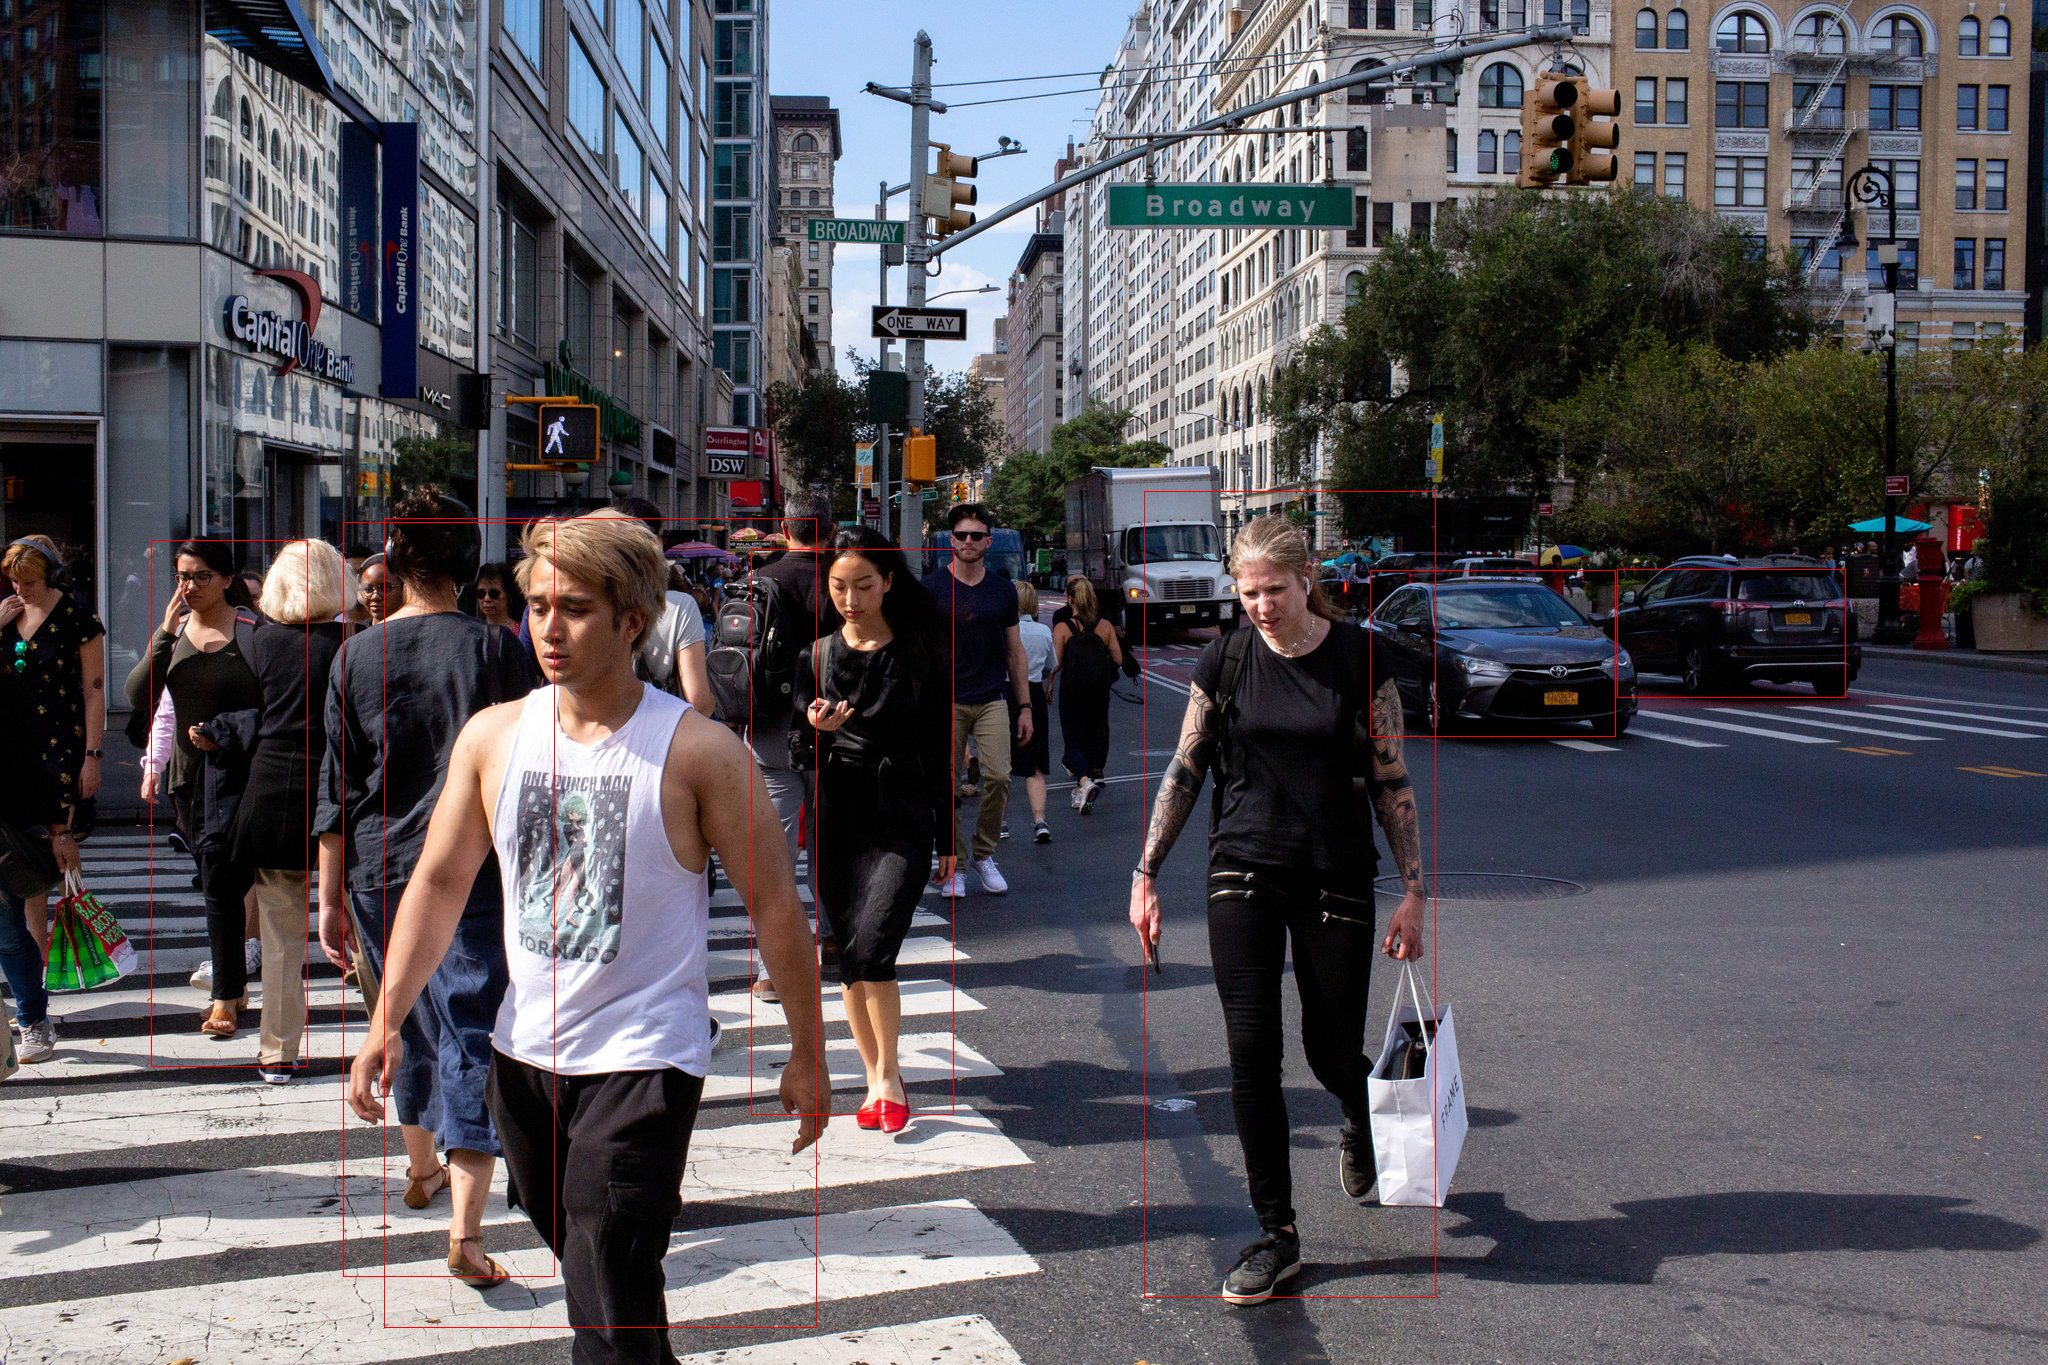

In [27]:
image